# Assignment #3 - Neural Networks


<font color="blue"> Apnav Poptani </font>

# I. Overview

The objective here is to train a Neural Network for regression on the regression data we already used on Assign1, we will use  5-fold cross validation to find out the best neural network parameters and present them. We also implemented the Neural Network for Non-Linear Logistic Regression on the classification dataset we used in Assign2, we will again use 5-fold cross validation and find the best parameter and present the cross validation accuracies.

# II. Data

The dataset used here for regression is Bike Sharing Dataset from the UCI machine learning repository. The dataset consists of 17389 data samples and 16 feature values, This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. The feature values of the data set are:
<br>
instant= record index 
<br> 
season = season (1:winter, 2:spring, 3:summer, 4:fall) 
<br>
yr = year (0: 2011, 1:2012) 
<br>
mnth = month ( 1 to 12) 
<br>
hr = hour (0 to 23) 
<br>
holiday = weather day is holiday or not
<br>
weekday = day of the week 
<br>
workingday = if day is neither weekend nor holiday is 1, otherwise is 0. 
<br> 
weathersit :
<br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy 
<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
<br>
temp = Normalized temperature in Celsius. The values are derived via
    \begin{equation*}
    \frac{t-t_{min}}{t_{max}-t_{min}} \\
    t_{min}=-8, t_{max}=+39 
    \end{equation*}
<br>
atemp = Normalized feeling temperature in Celsius. The values are derived via 
    \begin{equation*}
    \frac{t-t_{min}}{t_{max}-t_{min}} \\
    t_{min}=-16, t_{max}=+50 
    \end{equation*}

<br>
hum = Normalized humidity. The values are divided to 100 (max) 
<br>
windspeed: Normalized wind speed. The values are divided to 67 (max) 
<br>
casual = count of casual users 
<br>
registered: count of registered users 
<br>
cnt = count of total rental bikes including both casual and registered 
<br>
the two random variables are taken for testing the model and to filter out non predictive attributes.
<br>
The dataset and information is available on UCI machine learning repository.

## B.Reading the Data
Reading the .csv file for processing the data.


In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset=pd.read_csv('hour.csv')

## C.Preprocessing the Data
Checking if dataset has any null values.

In [126]:
dataset.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [127]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dropping columns:
instant, As this keeps count of entries, casual which gives count of casual users ,registered gives count of registered users , dropping these columns as they add up to form out target value 'cnt'.

In [128]:
dataset=dataset.drop(['instant','casual','registered'],axis=1)

## D.Visualization of Data and Preliminary Observations

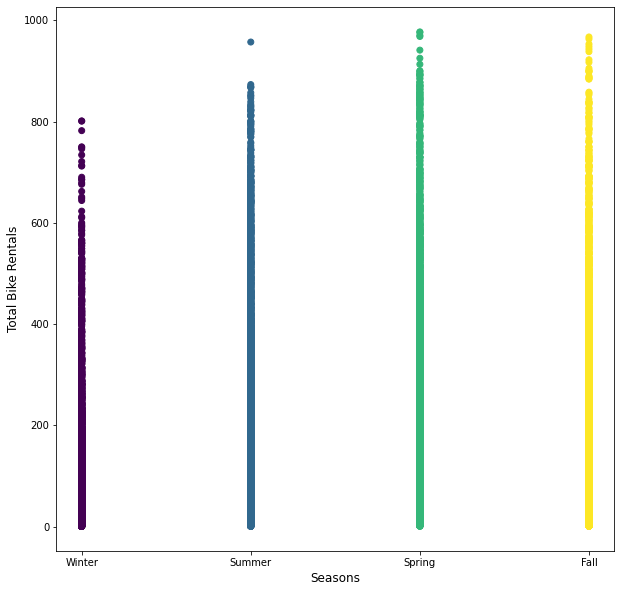

In [129]:
plt.rcParams["figure.figsize"] = (10,10)
x = [1,2,3,4]
labels = ['Winter', 'Summer', 'Spring','Fall']
plt.xticks(x, labels)
plt.xlabel('Seasons', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large');
plt.scatter('season', 'cnt', data=dataset, c='season')

#### <div align="center"> Fig 1 </div>

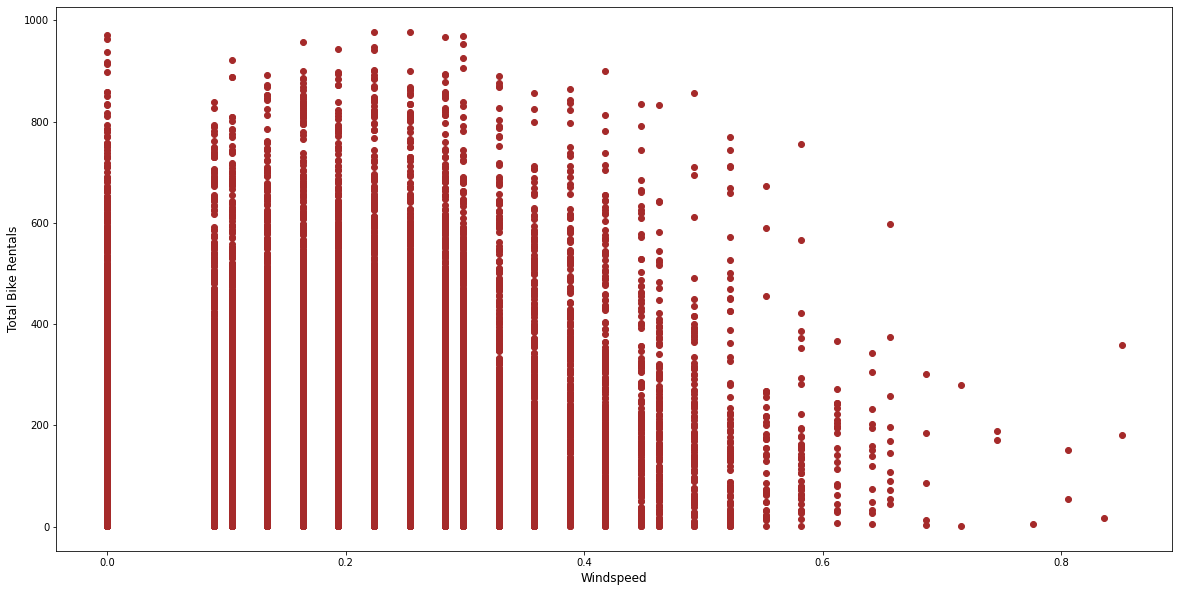

In [130]:
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Windspeed', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large')
plt.scatter(dataset['windspeed'], dataset['cnt'],color='brown')

#### <div align="center"> Fig 2 </div>

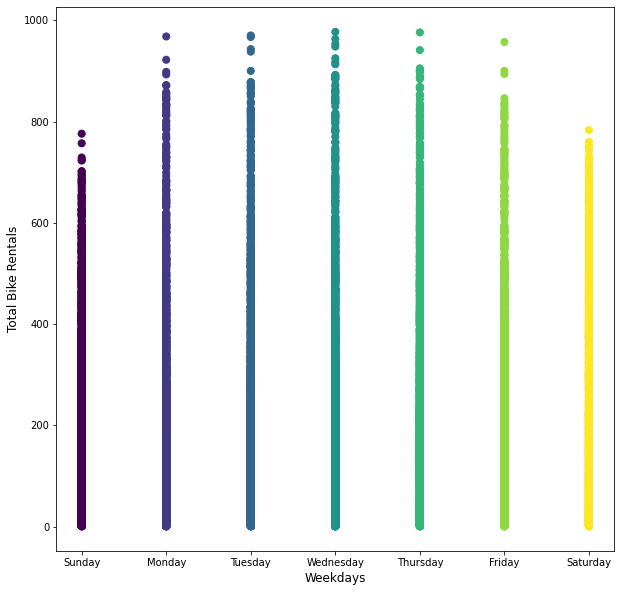

In [131]:
plt.rcParams["figure.figsize"] = (10,10)
x = [0,1,2,3,4,5,6]
labels = ['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.xticks(x, labels)
plt.xlabel('Weekdays', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large')
plt.scatter('weekday', 'cnt', data=dataset,s=50, c='weekday')

#### <div align="center"> Fig 3 </div>

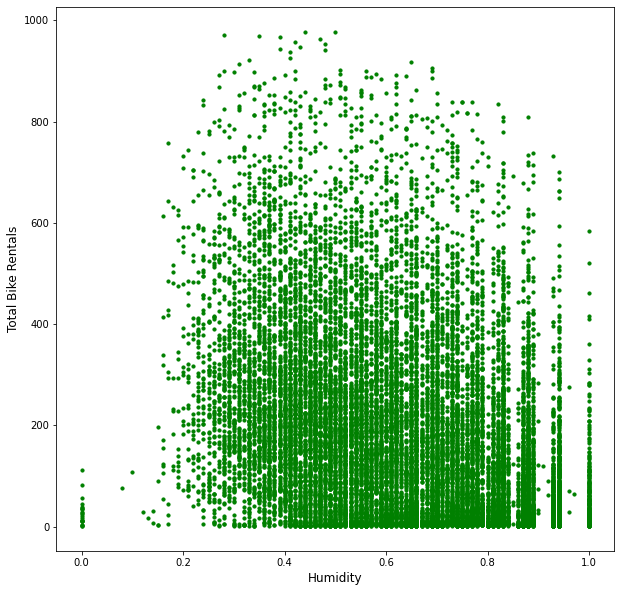

In [132]:
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Humidity', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large')
plt.scatter('hum', 'cnt', data=dataset,s=10, c='green')

#### <div align="center"> Fig 4 </div>

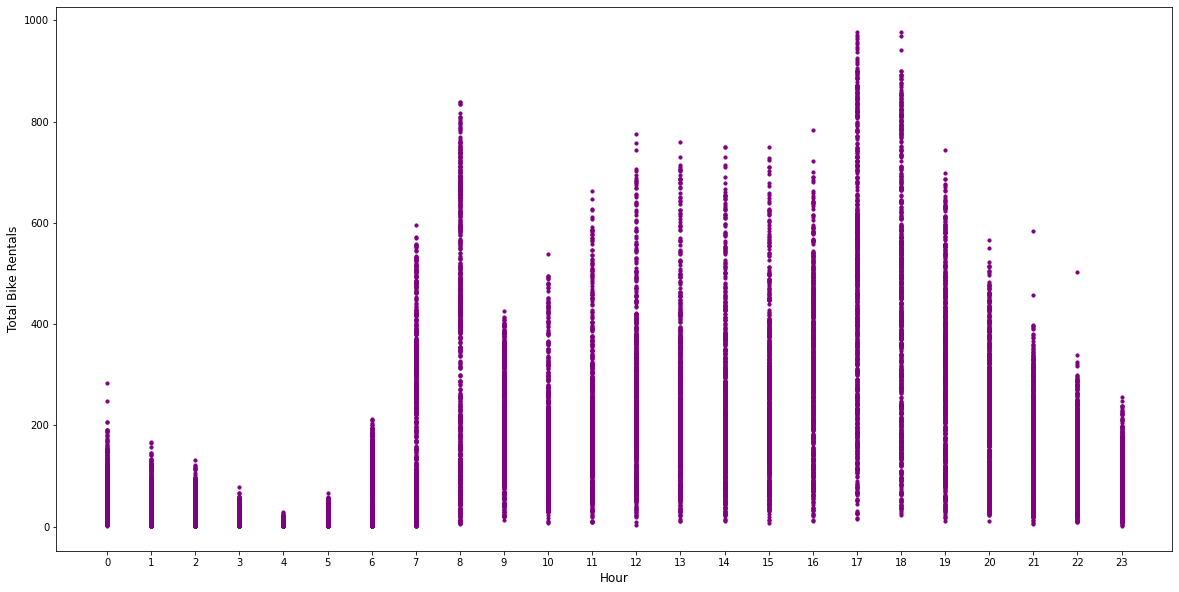

In [133]:
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks([x for x in range(0,24)])
plt.xlabel('Hour', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large');
plt.scatter('hr', 'cnt', data=dataset,s=10, c='purple')

#### <div align="center"> Fig 5 </div>

Text(0, 0.5, 'Total Bike Rentals')

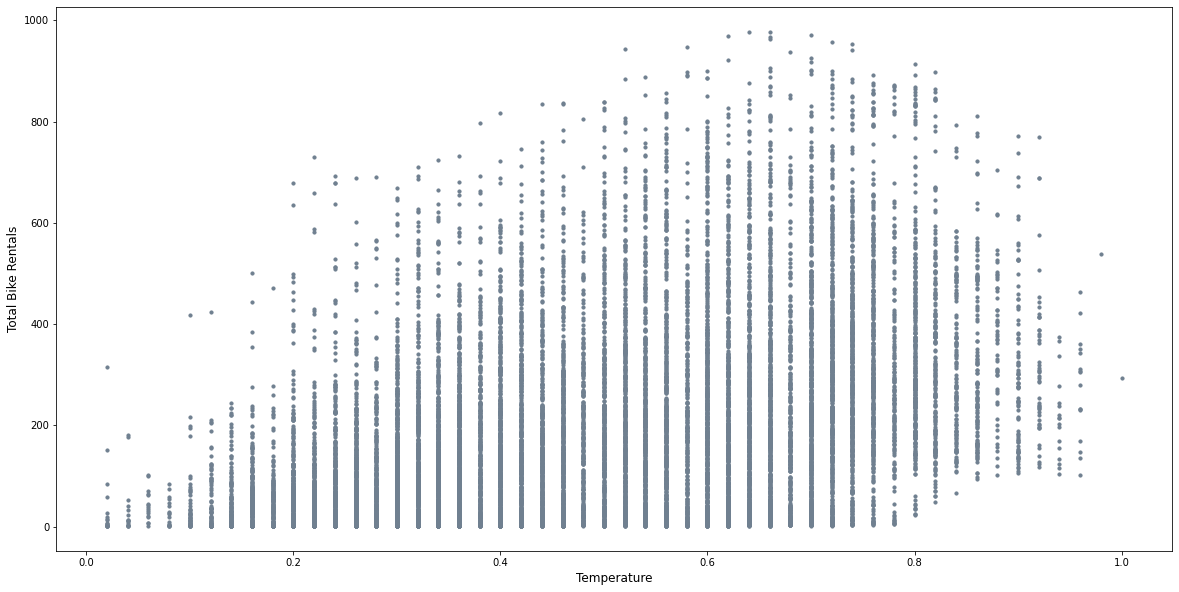

In [134]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter('temp' ,'cnt',data=dataset,c='slategray',s=10)
plt.xlabel('Temperature', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large')

## Preliminary observation
#### Fig1. Seasons vs Total Bike Rentals
The scatter plot shows the count of total bikes rented in that season with seasons. It can be clearly seen that most bikes were rented in spring season.

#### Fig2. Windspeed vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with respect to windspeed. It can be clearly seen that bike rentals are inversely proportional with windspeed.

#### Fig3. Weekdays vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with days of week. It can be clearly seen that most bikes were rented in weekdays.

#### Fig4. Humidity vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with respect to Humidity. It can be clearly seen that most bikes were rented in more humid conditions.

#### Fig5. Hour of day vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with respect to hour of day. It can be clearly seen that most bikes were rented in peak office hours.

#### Fig6. Temperature vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with respect to temperature. It can be clearly seen that most bikes were rented in warmer temperature.

#### <div align="center"> Fig 6 </div>

# III. Methods

## Summary for 5-fold Cross Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models. It has a single parameter k that refers to number of samples the given dataset is going to be divided into. Here we choosing k=5 therefore it is 5-fold cross validation.After splitting the dataset into 5 parts we will choose one portion as testing sample and the rest as training sample, we will repeat the same process with each k-fold and get the best suited parameter for the neural network which gives the best results.

In [135]:
class StandardScaler():
    
    def __init__(self):
        self.mean = None
        self.std = None
        
    def fit_transform(self,X):
        self.mean = np.mean(X)
        self.std = np.std(X)
        return (X - self.mean) / self.std
    
    def transform(self,X):
        return (X - self.mean) / self.std

In [12]:
def scale(x):
    return StandardScaler().fit_transform(x)

In [87]:
dataset_scaled = dataset.apply(scale,axis=1)
X=dataset_scaled.drop(['cnt','atemp'],axis=1).values
y =dataset_scaled["cnt"].values.reshape(-1,1)

### Explanation of Code

Here we are creating standard scaler function and passing attributes and target to convert the entire dataset into required range. StandardScaler class will normalize all the values. We are then assigning X and Y i.e target value. 

In [19]:
def split(X,y,i):
    num_batchs = 5
    batch_size = int(dataset_scaled.shape[0] / num_batchs)
    train_idx = np.arange(i*batch_size , (i+1)*batch_size)
    test_idx = set(np.arange(X.shape[0])).difference(set(train_idx))
    test_idx = np.array(list(test_idx))
    return X[train_idx , :] , X[test_idx , :] , y[train_idx , :] ,y[test_idx , :]

In [33]:
from sklearn.metrics import mean_squared_error
best_paramlist=[]
final_list=[]

def cross_validatation(X,y,parameters):
 
    for i in range(5): 
        print("Test number: ",i)
        history_rmse=[]
        params=[] 
        #best_param

        for k in range(5): 
            print("K is : ",k)
            X_train , X_test , y_train , y_test = split(X ,y,k )
   
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, y_train)
                pred = model.use(X_test)
                valid_err = np.sqrt(mean_squared_error(y_test, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        best_model.train(X_train, y_train)

        finalpred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(y_test, pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

### Explanation of Code 

Here we have two functions split() and cross_validation(). The split() is used to divide the data into k number of folds , here we have given k as 5 so the function will divide the dataset into 5 parts. The cross_validation() will first take the input data and partition the target as well as features into train and test dataset of 5 parts. Then we will iterate through the data ,first for loop iterates through the 5 parts of the data to get one part as the test dataset and the rest as training. Next for loop will iterate and take the data which will be used for validation part ,so the rest of the data will used of training, after this we will use all the parameters passed to see which parameter gives the best results in the NeuralNet class on that training data. We will store all these parameters and results and get the best one from it.Then we will again call the NeuralNet class with the best parameter. This will iterate through all the 5 folds and get the best parameters for the NeuralNet.

## Neural Network

In [99]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
  
    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []
        
        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
               
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        Y, Z = self.forward(X)
        if retZ:
            return Y, Z
        return Y

## Explanation of Codes

Here the NeuralNet class will build a neural network that will give the predictions.<br>
nlayers is number of hidden units,rho is the learning rate, W is the weights.<br>
The nunit will take number of input, hidden and output units, the pack and unpack functions will take the weights of all layers and turns into one vector and vice versa respectively.Forward pass will propagate the network by multiplying the weights with the input layer further the activation function will make the network non-linear. The backward pass will take the target and error as input and the weights are updated accordingly.<br>
The train funtion will take in the input features and target data, gradientf will unpack the weights then calls the forward pass function, further it calculates the error based on forward pass after which back propagation takes target and error as input and updates the weights.<br>

## Presentation of CV Results and Non-Linear Regression Results

In [34]:
import warnings 
warnings.filterwarnings('ignore')
models = [[11,5,1],[11,4,1],[11,8,1], [11,12,1], [11,10,1]]
bestAccuracy,bestParam = cross_validatation(X,y,models)

Test number:  0
K is :  0
[[11, 5, 1], [11, 4, 1], [11, 8, 1], [11, 12, 1], [11, 10, 1]]
[0.024363052067555558, 0.022791813641605322, 0.022308355420546055, 0.023211755754095422, 0.02504745520715239]
0.022308355420546055
[11, 8, 1]
K is :  1
[[11, 5, 1], [11, 4, 1], [11, 8, 1], [11, 12, 1], [11, 10, 1]]
[0.019081644631758765, 0.020932697153229946, 0.032599324877530145, 0.02958669238602129, 0.025778145169695597]
0.019081644631758765
[11, 5, 1]
K is :  2
[[11, 5, 1], [11, 4, 1], [11, 8, 1], [11, 12, 1], [11, 10, 1]]
[0.009770169807635034, 0.008358664451664503, 0.006954898044274207, 0.0076933412950445585, 0.007218014490814763]
0.006954898044274207
[11, 8, 1]
K is :  3
[[11, 5, 1], [11, 4, 1], [11, 8, 1], [11, 12, 1], [11, 10, 1]]
[0.013831106541693935, 0.012931933944722395, 0.010786961538161778, 0.013386918118718972, 0.014412235846956422]
0.010786961538161778
[11, 8, 1]
K is :  4
[[11, 5, 1], [11, 4, 1], [11, 8, 1], [11, 12, 1], [11, 10, 1]]
[0.02064398559942182, 0.0245197832176785, 0.0458

In [35]:
print(bestAccuracy,bestParam)

[0.025640049089479724, 0.017740508764989792, 0.03662991469000503, 0.04062442577180175, 0.05549542323000316] [[11, 8, 1], [11, 8, 1], [11, 8, 1], [11, 8, 1], [11, 8, 1]]


In [193]:
X_a=dataset.drop(['cnt','atemp'],axis=1).values
y_t =dataset["cnt"].values.reshape(-1,1)

In [194]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_a,y_t, test_size=0.25, random_state=42)

## Implementing the best value in neural net

In [204]:
nn = NeuralNet([11,8,1])
nn.train(xtrain,ytrain,niter=1000)

{'w': array([-3.44711735e-01,  2.47243474e+00,  3.11636965e+00, -1.83824894e+01,
         1.59949584e+01,  4.61533809e-01, -1.81246414e+01,  3.20202183e+00,
        -5.37676775e-01, -4.47694475e-01,  9.42223571e-02,  4.50535931e-01,
         9.85950815e-02,  5.23383214e-01,  3.25269263e-01,  7.67933186e-01,
        -2.10758537e-01, -2.51798849e+00,  9.88479287e+00,  7.06130680e-01,
         4.24275613e-01,  2.42987331e-01,  5.63258518e-01,  5.19951064e-01,
        -1.02448307e+00,  7.74196366e-02, -8.45995662e-02, -1.63643634e-01,
         5.37216276e-02,  9.22481644e-01, -2.84797549e-02,  2.31084497e-02,
        -1.32005765e+00, -8.32254145e-03, -1.18916589e+00,  1.77405805e+00,
        -2.23878876e+00,  7.47062709e-01,  1.86865203e+00, -4.30978737e-01,
         5.72860774e-02,  5.96790085e-01, -2.62137756e+00, -1.29516957e+00,
        -2.30062368e+00,  9.26619888e-02,  2.21713658e+00, -5.57687212e-01,
        -3.71019781e-01, -3.67107033e-02, -1.56173593e-01,  9.49813105e-04,
       

In [205]:
ypred=nn.use(xtest)
ypred

array([[400.47476488],
       [169.88224521],
       [ 23.32202702],
       ...,
       [ 93.42958895],
       [ 67.44016223],
       [ 82.37145294]])

## Discussions about parameter/network structure choice

Here we have 3 layers of neural network.Input layer of size 11 as we have 11 features and output layer of 1 unit as we are predicting one target variable. In cross validation we have repeated the training of neural network with different number of hidden units on different parts of the data. Here we see that we have most of the best results with the hidden units size as 5 and we can observe that the as the number of hidden units increase the model does not improve hence we can say that the model is not performing well. These are the best values and their parameters we received [0.025640049089479724, 0.017740508764989792, 0.03662991469000503, 0.04062442577180175, 0.05549542323000316] [[11, 8, 1], [11, 8, 1], [11, 8, 1], [11, 8, 1], [11, 8, 1]]

## Plots for results

In [206]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)))

RMSE: 114.55611858336012


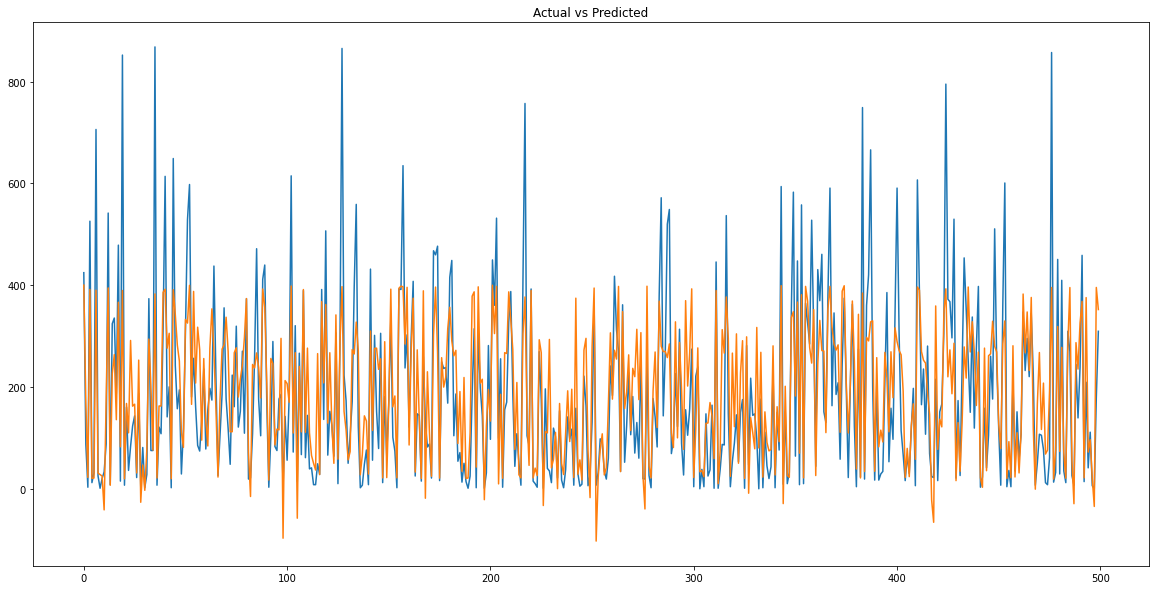

In [207]:
plt.plot(ytest[:500])
plt.plot(ypred[:500])
plt.title("Actual vs Predicted")
plt.show()

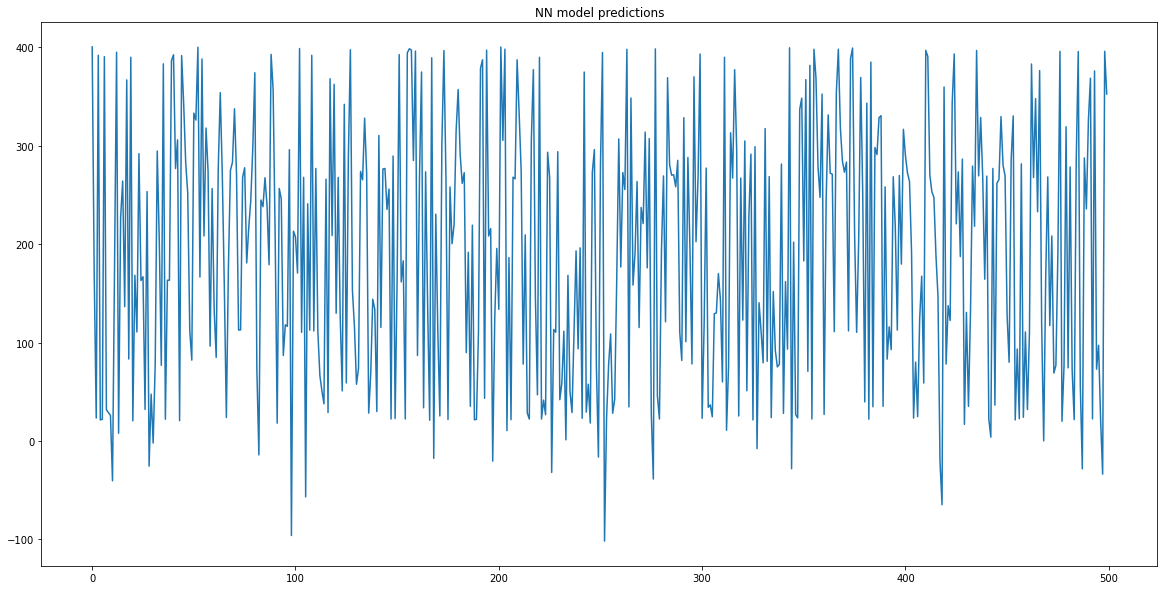

In [209]:
plt.plot(ypred[:500])
plt.title("NN model predictions")
plt.show()

## Discussion about the prediction results

We have RMSE value of 114.55611858336012 after performing nonlinear regression using neural network on the regression dataset. These were the results with 11 input units , 8 hidden units and 1 output unit. We chose 8 number of hidden units as it gave the best results in cross validation and suits our data.We have tanh activation function . If we increase the number of hidden units the model does not perform well, hence using just 11 hidden units.We can see the plot out predictions really fits our actual data.So we got the best parameters from the cross validation.

##  Nonlinear Logistic Regression

## Data Description

The dataset used here for classification is default of credit card clients Data Set from Kaggle datasets. The dataset consists of 30000+ data samples and 24 feature values. The data here classifies default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.
<br>
LIMIT_BAL = Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit
<br>
SEX = Gender (1 = male; 2 = female)
<br>
EDUCATION = Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
<br>
MARRIAGE = Marital status (1 = married; 2 = single; 3 = others)
<br>
AGE = Age (year)
<br>
History of past payment (The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 3 = payment delay for three months ;4 = payment delay for four months; 5 = payment delay for five months;6 = payment delay for six months; 7 = payment delay for seven months;8 = payment delay for eight months; 9 = payment delay for nine months and above)
<br>
PAY_0 = the repayment status in September, 2005
<br>
PAY_2 = the repayment status in August, 2005
<br>
PAY_3 = the repayment status in July, 2005
<br>
PAY_4 = the repayment status in June, 2005
<br>
PAY_5 = the repayment status in May, 2005
<br>
PAY_6 = the repayment status in April, 2005
<br>
Amount of bill statement (NT dollar)
<br>
BILL_AMT1 = amount of bill statement in September, 2005
<br>
BILL_AMT2 = amount of bill statement in August, 2005
<br>
BILL_AMT3 = amount of bill statement in July, 2005
<br>
BILL_AMT4 = amount of bill statement in June, 2005
<br>
BILL_AMT5 = amount of bill statement in May, 2005
<br>
BILL_AMT6 = amount of bill statement in April, 2005
<br>
Amount of previous payment (NT dollar)
<br>
PAY_AMT1 = amount paid in September, 2005
<br>
PAY_AMT2 = amount paid in August, 2005
<br>
PAY_AMT3 = amount paid in July, 2005
<br>
PAY_AMT4 = amount paid in June, 2005
<br>
PAY_AMT5 = amount paid in May, 2005
<br>
PAY_AMT6 = amount paid in April, 2005
<br>
default payment next month (Yes = 1, No = 0)




### Reading the Data

Reading the .csv file for processing the data.

In [210]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dataset=pd.read_excel('default of credit card clients.xls')

## Plots for Understanding or Analysis

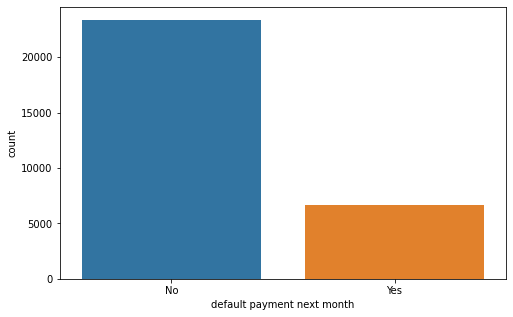

In [211]:
plt.rcParams["figure.figsize"] = (8,5)
sns.countplot(dataset['default payment next month'],label="Count").set_xticklabels(["No", "Yes"])
plt.show()

#### <div align="center"> Fig 1. Ratio of default payment next month </div>

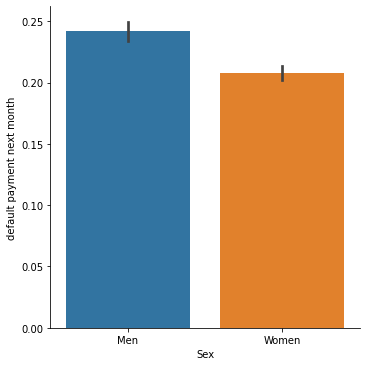

In [212]:
sns.catplot(x='SEX',y='default payment next month',data=dataset,kind='bar'
).set_axis_labels("Sex","default payment next month").set_xticklabels(["Men", "Women"])
plt.show()

#### <div align="center"> Fig 2. Sex vs default payment next month </div>

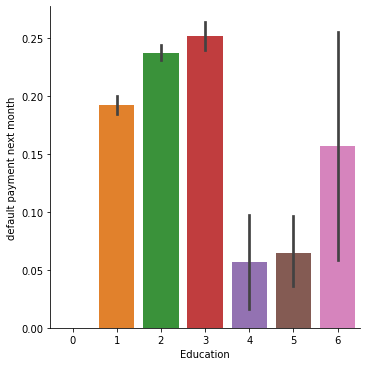

In [213]:
sns.catplot(x='EDUCATION',y='default payment next month',data=dataset,kind='bar').set_axis_labels("Education","default payment next month")
plt.show()

#### <div align="center"> Fig 3. Education vs default payment next month</div>

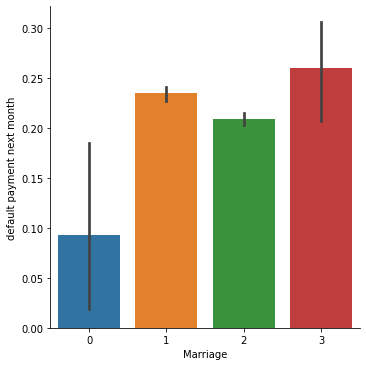

In [214]:
sns.catplot(x='MARRIAGE',y='default payment next month',data=dataset,kind='bar').set_axis_labels("Marriage","default payment next month")
plt.show()

#### <div align="center"> Fig 4.Marriage vs default payment next month</div>

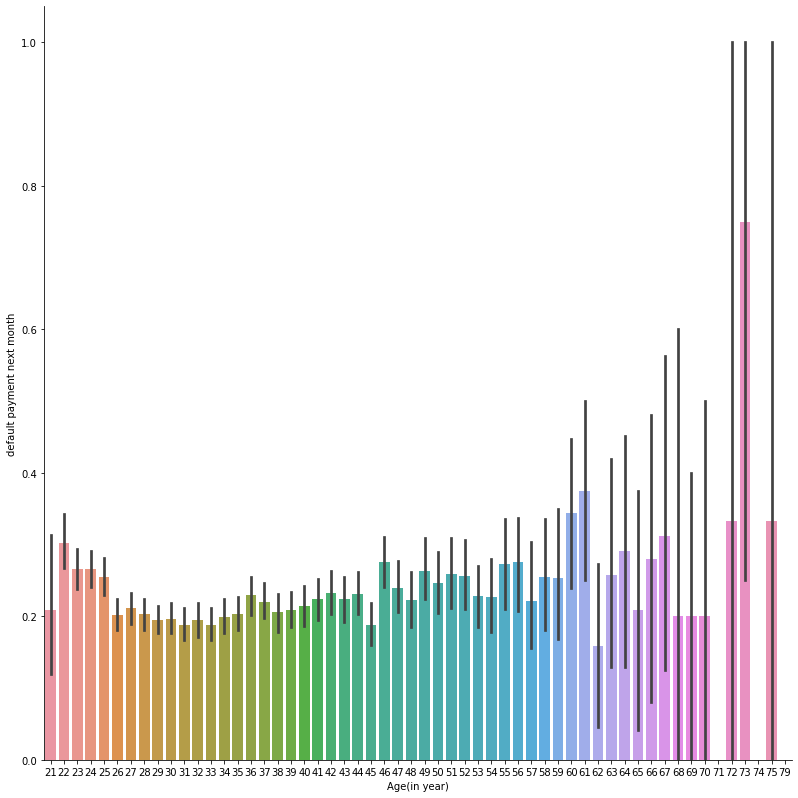

In [215]:
sns.catplot(x='AGE',y='default payment next month',data=dataset,kind='bar',height=11).set_axis_labels("Age(in year)","default payment next month")
plt.show()

#### <div align="center"> Fig 5. Age vs default payment next month</div>

## Preliminary Observation

The Plots above show us that:

<b>Fig1:</b> This graph shows gender ratio with respect to default payment next month. It can be clearly seen that the graph for less number of users will be paying credit card payments on time.<br>

<b>Fig2:</b> This catplot shows the Gender ratio with default payment method. It can be seen that males have higher on-time payment ratio to females.<br>

<b>Fig3:</b>This catplot shows the effect of education on default payment next month, as it can be seen that with increase in education the default payment next month probability of the user also increases.<br>

<b>Fig4:</b>This catplot shows the effect of marital status of an adult on his/her default payment next month,here it can be seen that adults who are married have greater probability of default payment next month.<br>

<b>Fig5:</b>This catplot shows the effect of age of an adult on his/her default payment next month,here it can be seen that adults who are above age of 60 have greater probability of default payment next month with slight variance.<br>



In [216]:
dataset1=dataset.drop('default payment next month',axis=1)
dataset2=pd.DataFrame(dataset.iloc[:,-1])

## Summary for Non-Linear Logistic  Regression

Logistic regression is a statistical method for predicting binary classes. It is a special type of regression in which the goal is to model the probability of something as a function of other variables. In Linear Regression, the output is the weighted sum of inputs. Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a activation function that can map any real value between 0 and 1. In nonlinear logistic regression we add extra layers the hidden layers with which the softmax function is used in the last layer. Till then the input layer passes its output to hidden layer, then the hidden layer to another hidden layer or softmax function and the softmax function then gives the output.

In [217]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])
   
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

## Explanation of Code

Here we have NeuralNetLogReg class which has a call to the consturctor for initializing the values to nLayers.Where,<br>
nLayer is the number of layers.<br>
rho is the learning rate.<br>
W is the weights.<br>
The train funcion here will take the features data which are 3 and and the target as input.Similar to previous NeuralNet class the gradientf() will unpack the weights by callin unpack.Then similar to NeuralNet class we will call the forward() which will multiply the weights with the input and update them after which back propagation is called which will take the target and error as input.The use() will call forward() to update the weights and give the predicted probablity and labels .

In [232]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [333]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection

## Examination of Correct Implementation with toy data

Text(0.5, 1.0, 'test data set')

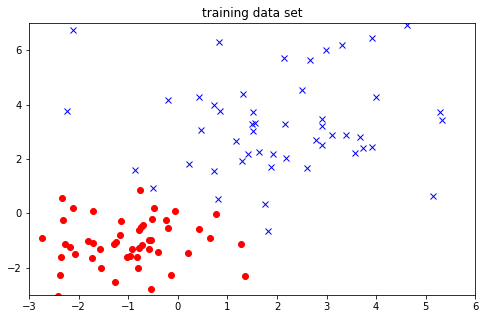

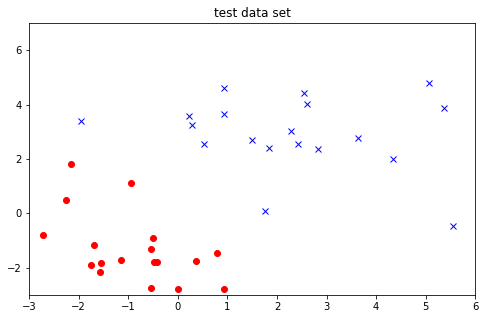

In [334]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [335]:
# Apply Nonlinear Logistic Regression
from imp import reload
#import warnings 
#warnings.filterwarnings('ignore')

clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

In [336]:
classes

array([[0.51489308, 0.48510692],
       [0.51407817, 0.48592183],
       [0.51448048, 0.48551952],
       [0.50919614, 0.49080386],
       [0.51532731, 0.48467269],
       [0.51483809, 0.48516191],
       [0.51173244, 0.48826756],
       [0.51176293, 0.48823707],
       [0.51553287, 0.48446713],
       [0.51546301, 0.48453699],
       [0.51294234, 0.48705766],
       [0.51703733, 0.48296267],
       [0.51604043, 0.48395957],
       [0.51445837, 0.48554163],
       [0.51358667, 0.48641333],
       [0.51152883, 0.48847117],
       [0.51569483, 0.48430517],
       [0.51393465, 0.48606535],
       [0.5071806 , 0.4928194 ],
       [0.50543087, 0.49456913],
       [0.50192693, 0.49807307],
       [0.49759309, 0.50240691],
       [0.50085091, 0.49914909],
       [0.49649489, 0.50350511],
       [0.50109608, 0.49890392],
       [0.50016261, 0.49983739],
       [0.50186752, 0.49813248],
       [0.4963373 , 0.5036627 ],
       [0.49626341, 0.50373659],
       [0.49826224, 0.50173776],
       [0.

In [337]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

Accuracy:  50.0 %


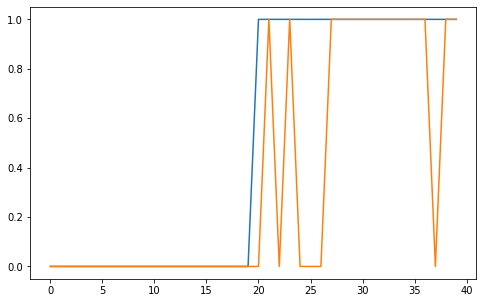

In [338]:
plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

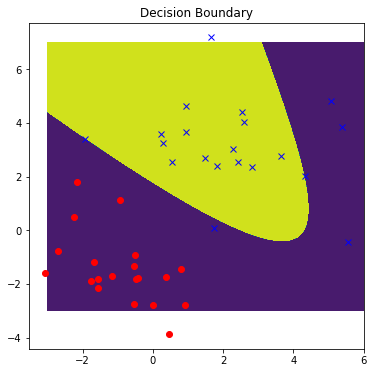

In [339]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

## Discussion about Dummy Data

We tested the code with dummy data it worked fine with an accuracy of 50%.

## Cross Validation for Non-Linear Logistic Regression

In [341]:
def split(X,y,i):
    num_batchs = 5
    batch_size = int(dataset.shape[0] / num_batchs)
    train_idx = np.arange(i*batch_size , (i+1)*batch_size)
    test_idx = set(np.arange(X.shape[0])).difference(set(train_idx))
    test_idx = np.array(list(test_idx))
    return X[train_idx , :] , X[test_idx , :] , y[train_idx , :] ,y[test_idx , :]

In [358]:
final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    
    for test in range(5): 
        print("Test number: ",test)
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("K is : ",val)
            X_train , X_test , y_train , y_test = split(X ,y,val)
            flist=[]
            paramlist=[]
            for param in parameters:
                model = NeuralNetLogReg(param)
                model.train(X_train, y_train)
                prob,pred = model.use(X_test)
                y_test1=y_test[:,0]
                y_test1=np.where(y_test1==0,1,0)
                valAcc = f1_score(y_test, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        bestModel.train(X_train, y_train)

        prob1,finalPred = bestModel.use(X_test)
        Ttest1=y_test[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

Explanation of Code at beginning of the section.

## Presentation of CV  results

In [360]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
dataset=pd.read_excel('default of credit card clients.xls')

In [362]:
X=dataset.drop(['default payment next month'],axis=1).values
y =dataset['default payment next month'].values.reshape(-1,1)

In [364]:
models = [[24,5,2], [24,7,2],[24,9,2], [24,12,2]]
bestAccuracy,bestParam = (cross_validate(X,y, models))

Test number:  0
K is :  0
[0.24347826086956526, 0.36248319602909246, 0.19046818525678744, 0.34414322250639384]
[[24, 5, 2], [24, 7, 2], [24, 9, 2], [24, 12, 2]]
0.36248319602909246
[24, 7, 2]
K is :  1
[0.3592478632478632, 0.3525307624001015, 0.0030109145652992093, 0.34341547524965876]
[[24, 5, 2], [24, 7, 2], [24, 9, 2], [24, 12, 2]]
0.3592478632478632
[24, 5, 2]
K is :  2
[0.35460257075335755, 0.015498015498015497, 0.34945364059288103, 0.14912593649661077]
[[24, 5, 2], [24, 7, 2], [24, 9, 2], [24, 12, 2]]
0.35460257075335755
[24, 5, 2]
K is :  3
[0.12038177339901476, 0.36788112197948264, 0.33653216171426376, 0.32416381870132777]
[[24, 5, 2], [24, 7, 2], [24, 9, 2], [24, 12, 2]]
0.36788112197948264
[24, 7, 2]
K is :  4
[0.005133846718005134, 0.37026432844214946, 0.3658241416271913, 0.3690592334494774]
[[24, 5, 2], [24, 7, 2], [24, 9, 2], [24, 12, 2]]
0.37026432844214946
[24, 7, 2]
history_rmse [0.36248319602909246, 0.3592478632478632, 0.35460257075335755, 0.36788112197948264, 0.370264

In [367]:
print(bestAccuracy)
print(bestParam)

[0.0011800042909246942, 0.8739736311171585, 0.009076832719312297, 0.07998778812395053, 0.07898089171974522]
[[24, 7, 2], [24, 7, 2], [24, 5, 2], [24, 9, 2], [24, 9, 2]]


## Non-Linear Logistic Regression Results

In [388]:
nn = NeuralNetLogReg([24,7,2])
nn.train(XTrain, YTrain,optim='scg') 
p,label1 = nn.use(XTest)

In [389]:
y_pred1=label1
y_test1=np.where(YTest==1,0,1)
print('Accuracy:', accuracy_score(y_test1, y_pred1))

Accuracy: 0.9994666666666666


## Discussions about parameter/network structure choice

Here we have a neural network of 3 layers with 3 number of input units as their as three feature values in the dataset and 2 output units as we are prediction the probability and the labels. We have taken different number of hidden layers using cross validation tested it on the data. We got the best result with 15 hidden layers which is accuracy of 100% , as we increase the number of hidden layers the accuracy goes on increasing as we got an accuracy of 74% with 5 units and 9 hidden units gave an accuracy of 96% hence we can say that the model is overfitting the data. The model is not learning but it is memorizing and predicting the output. Finally, we have used [3,15,2] as the best parameter which gave best results.

## Plots for Results

In [390]:
cf3=confusion_matrix(y_test1, label1)
cf3
TP=cf3[1][0]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

In [391]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)

In [392]:
print('Precision: ' ,precision)
print('Recall: ' ,recall)

Precision:  1.0
Recall:  0.5


Text(0.5, 1.0, 'Confusion Matrix')

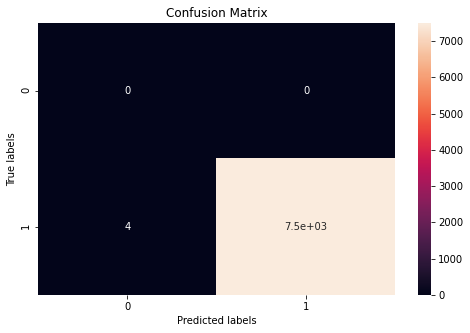

In [393]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

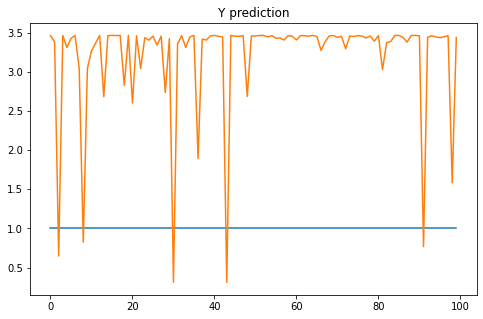

In [394]:
plt.title("Y prediction")
plt.plot(label1[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

## Discussion about the prediction results

We have performed Nonlinear logistic regression using neural networks. We trained the neural network with 12 hidden units as it was the best fit for our model as it gave good results we have Precision of 1.0 Recall of 0.5 on our dataset.We chose these parameters as it gave best results on cross validation.On increasing the number of units the accuracy of the model kept on increasing. The Neural net gave an accuracy of 55% with 12 hidden units in our data. 

# Conclusions

Here we have implemented Neural Networks. We have learned to implement K-fold Cross Validation on our data, which taught us to select best parameters for our network for which we got the best accuracy.We have also implemented different activation fucntions which showed us the difference an activation function can make to our neural network.Challenges faced in the assignment were to implement K-fold cross validation as we had to implement it without using any libraries.  

# References

[1] Hadi Fanaee-T. Bike Sharing Dataset Data Set, Dec. 2013, https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
<br>
[2] Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg,doi:10.1007/s13748-013-0040-3
<br>
[3] Yeh, I. C., & Lien, C. H., 'The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients' (2009), Expert Systems with Applications, 36(2), 2473-2480.<br>
[4] Professor's Notebooks
<br>
[6] Stephanie. Nonlinear Regression: Simple Definition & Examples. 9 Dec. 2017, https://www.statisticshowto.datasciencecentral.com/nonlinear-regression/.
<br>
[7] Nonlinear Regression. https://www.statisticssolutions.com/regression-analysis-nonlinear-regression/.

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function).

In [395]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset=pd.read_csv('hour.csv')

# Tanh

In [396]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
  
    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []
        
        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
               
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        Y, Z = self.forward(X)
        if retZ:
            return Y, Z
        return Y

In [435]:
def split(X,y,i):
    num_batchs = 5
    batch_size = int(dataset_scaled.shape[0] / num_batchs)
    train_idx = np.arange(i*batch_size , (i+1)*batch_size)
    test_idx = set(np.arange(X.shape[0])).difference(set(train_idx))
    test_idx = np.array(list(test_idx))
    return X[train_idx , :] , X[test_idx , :] , y[train_idx , :] ,y[test_idx , :]

In [397]:
from sklearn.metrics import mean_squared_error
best_paramlist=[]
final_list=[]

def cross_validatation(X,y,parameters):
 
    for i in range(5): 
        print("Test number: ",i)
        history_rmse=[]
        params=[] 
        #best_param

        for k in range(5): 
            print("K is : ",k)
            X_train , X_test , y_train , y_test = split(X ,y,k )
   
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, y_train)
                pred = model.use(X_test)
                valid_err = np.sqrt(mean_squared_error(y_test, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        best_model.train(X_train, y_train)

        finalpred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(y_test, pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

In [442]:
dataset_scaled = dataset.apply(scale,axis=1)
X=dataset.drop(['cnt','atemp','instant','casual','registered'],axis=1).values
y =dataset["cnt"].values.reshape(-1,1)

In [399]:
import warnings 
warnings.filterwarnings('ignore')
models = [[24,12,1],[24,16,1],[24,20,1], [24,24,1], [24,28,1]]

bestAccuracy,bestParam = cross_validatation(X, y, models)

Test number:  0
K is :  0
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.4189781611679089, 0.4133858674461597, 0.4221213835452088, 0.46795732067943185, 0.43733904541628593]
0.4133858674461597
[24, 16, 1]
K is :  1
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.45526044274410005, 0.45807626139541396, 0.41919610420128417, 0.4233409609929262, 0.4100584248222457]
0.4100584248222457
[24, 28, 1]
K is :  2
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.4112642396568356, 0.4193410656019598, 0.4129079249841464, 0.4157198392033796, 0.4105175110130965]
0.4105175110130965
[24, 28, 1]
K is :  3
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.41121799050584884, 0.42021084181890667, 0.43155117773520874, 0.4357158355002668, 0.4259536407954082]
0.41121799050584884
[24, 12, 1]
K is :  4
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.41653262967774274, 0.4154709049886291, 0.4592191812503664, 0.421

In [400]:
print(bestAccuracy,bestParam)

[0.45846067632655946, 0.4301492980347236, 0.45698903292537263, 0.4095524914981863, 0.43393195344483676] [[24, 16, 1], [24, 16, 1], [24, 28, 1], [24, 28, 1], [24, 28, 1]]


In [403]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [407]:
import warnings 
warnings.filterwarnings('ignore')
model=NeuralNet([24,28,1])  
model.train(x_train,y_train,niter=1000)

{'w': array([ 8.54770912e-02, -8.10274948e-02, -5.52753297e-02, -5.97280843e-02,
        -7.51201313e-02,  3.46452313e-02,  3.17363535e-03,  9.34255679e-02,
        -1.48079392e-02, -8.88220032e-02, -2.74937949e-02, -1.52669176e-02,
        -4.76157569e-02,  6.10064885e-02, -7.07478490e-02,  1.97450025e-02,
        -5.66390486e-02,  2.54004953e-02, -4.86275005e-02, -9.85851411e-02,
        -7.19569337e-02,  6.10899595e-02,  4.71427394e-02,  4.49017006e-02,
         2.48796373e-02, -3.78156477e-02, -7.09690622e-02, -7.70481065e-02,
        -2.09475954e-02, -7.45300948e-03, -9.37791092e-02, -6.23452482e-02,
        -6.89724236e-02,  6.12543280e-02, -4.96392794e-02,  4.57271827e-02,
         1.95383424e-02, -8.26367460e-02,  4.23551954e-02,  8.28154062e-02,
         1.19560016e-02, -9.15899754e-02, -2.83978180e-02,  8.07489677e-04,
         3.98227546e-02, -4.97867671e-02, -4.35124902e-02,  2.23810578e-02,
        -9.42917167e-02, -7.07983411e-02,  3.32530417e-02, -1.04961855e-02,
       

In [408]:
y_p=model.use(x_test)

In [409]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_p)))

RMSE: 0.42995886157863944


# Sigmoid

In [410]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.Sigma(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (np.exp(-Z[i])/(1+np.exp(-Z[i]))**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [443]:
def split(X,y,i):
    num_batchs = 5
    batch_size = int(dataset_scaled.shape[0] / num_batchs)
    train_idx = np.arange(i*batch_size , (i+1)*batch_size)
    test_idx = set(np.arange(X.shape[0])).difference(set(train_idx))
    test_idx = np.array(list(test_idx))
    return X[train_idx , :] , X[test_idx , :] , y[train_idx , :] ,y[test_idx , :]

In [411]:
from sklearn.metrics import mean_squared_error
best_paramlist=[]
final_list=[]

def cross_validatation(X,y,parameters):
 
    for i in range(5): 
        print("Test number: ",i)
        history_rmse=[]
        params=[] 
        #best_param

        for k in range(5): 
            print("K is : ",k)
            X_train , X_test , y_train , y_test = split(X ,y,k )
   
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, y_train)
                pred = model.use(X_test)
                valid_err = np.sqrt(mean_squared_error(y_test, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        best_model.train(X_train, y_train)

        finalpred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(y_test, pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

In [419]:
import warnings 
warnings.filterwarnings('ignore')
models = [[24,12,1],[24,16,1],[24,20,1], [24,24,1], [24,28,1]]

bestAccuracy,bestParam = cross_validatation(X,y, models)

Test number:  0
K is :  0
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.3963620167166566, 0.39566432230886756, 0.3917776822261963, 0.4013063182626084, 0.39876739749914936]
0.3917776822261963
[24, 20, 1]
K is :  1
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.3952641519819096, 0.39425700451982293, 0.39259165450091715, 0.39365652908140164, 0.3946608038578349]
0.39259165450091715
[24, 20, 1]
K is :  2
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.3926268004950414, 0.38993204132671905, 0.39208383379795897, 0.3906428915513413, 0.3902733393745872]
0.38993204132671905
[24, 16, 1]
K is :  3
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.39131864790998594, 0.3913390924020038, 0.39754179173874865, 0.39243897087052493, 0.3855276106324264]
0.3855276106324264
[24, 28, 1]
K is :  4
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.39911509910191284, 0.39727658953262035, 0.39493555635866423, 

In [420]:
print(bestAccuracy,bestParam)

[0.39609531295776806, 0.3955943313251215, 0.3992302709449088, 0.39804842429728066, 0.3954549695082228] [[24, 24, 1], [24, 24, 1], [24, 20, 1], [24, 20, 1], [24, 24, 1]]


In [421]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [422]:
import warnings 
warnings.filterwarnings('ignore')
model=NeuralNet([24,24,1])  
model.train(x_train,y_train,niter=1000)

{'w': array([ 1.63285872e-01,  3.20410138e-02,  2.00750424e-02,  3.73154261e-02,
        -6.81958419e-02,  1.67806069e-01,  9.12097569e-03,  4.23854066e-02,
         1.79017341e-01, -6.09029308e-02,  7.45668672e-02, -8.91707096e-02,
        -2.50354469e-02, -9.84929550e-03,  4.57930834e-02, -7.58636680e-02,
         4.83105946e-02,  2.07692124e-01, -6.77560649e-02, -5.14621509e-02,
         8.21900144e-02, -6.39583923e-02,  1.56633978e-01, -9.54922957e-02,
         8.27222566e-02,  4.54988513e-02,  7.69079202e-02, -1.43431956e-02,
        -7.67592376e-02, -2.65647055e-03, -1.04004502e-01,  1.21353843e-01,
        -4.44416640e-02, -6.19863087e-02,  3.96929407e-02,  4.47463181e-02,
        -4.47151045e-03, -4.50914789e-02,  1.31125800e-01,  4.46005749e-02,
         2.67048344e-02, -5.05890531e-02,  1.20239646e-02, -4.22639529e-02,
         2.07236046e-03,  7.52338384e-02, -6.91001459e-02, -6.53680243e-02,
        -2.31209869e-01,  2.45679982e-01,  1.68621016e-01,  3.38103682e-02,
       

In [423]:
y_p=model.use(x_test)

In [424]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_p)))

RMSE: 0.3813105479894777


# Relu

In [425]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)
    
    def ReLU(self, x):
        return x * (x > 0)

    def dReLU(self, x):
        return 1. * (x > 0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1. * Z[i])
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [444]:
def split(X,y,i):
    num_batchs = 5
    batch_size = int(dataset_scaled.shape[0] / num_batchs)
    train_idx = np.arange(i*batch_size , (i+1)*batch_size)
    test_idx = set(np.arange(X.shape[0])).difference(set(train_idx))
    test_idx = np.array(list(test_idx))
    return X[train_idx , :] , X[test_idx , :] , y[train_idx , :] ,y[test_idx , :]

In [426]:
from sklearn.metrics import mean_squared_error
best_paramlist=[]
final_list=[]

def cross_validatation(X,y,parameters):
 
    for i in range(5): 
        print("Test number: ",i)
        history_rmse=[]
        params=[] 
        #best_param

        for k in range(5): 
            print("K is : ",k)
            X_train , X_test , y_train , y_test = split(X ,y,k )
   
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, y_train)
                pred = model.use(X_test)
                valid_err = np.sqrt(mean_squared_error(y_test, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        best_model.train(X_train, y_train)

        finalpred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(y_test, pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

In [427]:
import warnings 
warnings.filterwarnings('ignore')
models = [[24,12,1],[24,16,1],[24,20,1], [24,24,1], [24,28,1]]

bestAccuracy,bestParam = cross_validatation(X,y, models)

Test number:  0
K is :  0
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.39082438471560194, 0.406089254318662, 0.5050076197889115, 0.6639578172285795, 0.9235604224166157]
0.39082438471560194
[24, 12, 1]
K is :  1
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.4285464043370622, 0.48839278690434673, 0.612854288310004, 0.6337781964503417, 0.48431757040198997]
0.4285464043370622
[24, 12, 1]
K is :  2
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.40169219141905366, 0.40571858600897176, 0.4222262291570512, 0.39272669067408916, 0.4231089666283641]
0.39272669067408916
[24, 24, 1]
K is :  3
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.408764956894418, 0.40778072038852575, 0.4048071801780897, 0.44483882988295476, 0.554286370340703]
0.4048071801780897
[24, 20, 1]
K is :  4
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[0.4032098430984702, 0.38937363947938053, 0.40321847153982154, 0.40252

In [428]:
print(bestAccuracy,bestParam)

[0.43302589894303006, 0.46555069835713586, 0.38877504068551716, 0.39482558135600154, 0.4792917177972524] [[24, 28, 1], [24, 20, 1], [24, 28, 1], [24, 20, 1], [24, 28, 1]]


In [431]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [430]:
import warnings 
warnings.filterwarnings('ignore')
model=NeuralNet([24,28,1])  
model.train(x_train,y_train,niter=1000)

{'w': array([-2.72400017e-02, -5.54493492e-02,  5.01680286e-02,  2.35400919e-01,
         4.30597891e-02, -3.09401270e-02, -2.91187855e-03, -1.05746219e-03,
         2.41368947e-02, -2.99689543e-02,  2.68337798e-02,  3.28282257e-03,
        -8.65915016e-02,  2.75832795e-02, -1.83362158e-02,  5.48360667e-03,
         1.75002548e-01, -5.64845995e-02, -4.40128978e-02, -6.56667034e-02,
        -9.92895726e-02, -5.90288495e-03, -9.79688146e-02,  9.45015420e-02,
         4.11995208e-02, -1.14199474e-02, -1.42532359e-02,  3.28752130e-04,
         4.27885460e-02,  5.97633984e-02, -3.57559026e-02,  1.30412375e-02,
        -3.11177972e-02,  2.55818930e-02, -5.16161873e-03, -2.66313091e-02,
         1.01359578e-02,  2.68284458e-02, -5.27669839e-02, -1.60549497e-02,
        -2.69076070e-02, -7.67174187e-02, -6.47979182e-02,  1.08777640e-01,
         9.64196065e-02, -6.81468079e-02,  2.65155252e-02,  3.05222799e-02,
        -1.06581556e-02,  9.70325409e-02,  5.83371154e-02,  4.66925110e-02,
       

In [432]:
y_p=model.use(x_test)

In [433]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_p)))

RMSE: 0.3766553494723041


<b>Tanh:</b><br>
RMSE: 0.42995886157863944<br>
<b>Sigmoid:</b><br>
RMSE: 0.3813105479894777<br>
<b>Relu:</b><br> 
RMSE: 0.3766553494723041<br>